### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTENC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Paths

In [2]:
path = os.getcwd()

#### Data Sets

In [3]:
combined = 'Resources\\data_sets\\Wine_data_both.csv'
red =  'Resources\\data_sets\\Wine_data_red.csv'
white = 'Resources\\data_sets\\Wine_data_white.csv'

#### Vizs

In [4]:
combined_prelim = 'Resources\\figs\\combined\\prelim\\'
combined_unsc = 'Resources\\figs\\combined\\unscaled\\'
combined_sc = 'Resources\\figs\\combined\\scaled\\'

red_prelim = 'Resources\\figs\\red\\prelim\\'
red_unsc = 'Resources\\figs\\red\\unscaled\\'
red_sc = 'Resources\\figs\\red\\scaled\\'

white_prelim = 'Resources\\figs\\white\\prelim\\'
white_unsc = 'Resources\\figs\\white\\unscaled\\'
white_sc = 'Resources\\figs\\white\\scaled\\'

In [5]:
combined_prelim_path = path.replace('main',combined_prelim) 
combined_unsc_path = path.replace('main',combined_unsc) 
combined_sc_path = path.replace('main',combined_sc) 

red_prelim_path = path.replace('main',red_prelim) 
red_unsc_path = path.replace('main',red_unsc) 
red_sc_path = path.replace('main',red_sc) 

white_prelim_path = path.replace('main',white_prelim) 
white_unsc_path = path.replace('main',white_unsc) 
white_sc_path = path.replace('main',white_sc) 

### Data Frames

In [6]:
all_wine_raw_df = pd.read_csv(path.replace('main',combined)) 
red_wine_df = pd.read_csv(path.replace('main',red))
white_wine_df = pd.read_csv(path.replace('main',white))

---

### Red & White wines Dataframe

In [7]:
all_wine_raw_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [8]:
all_wine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Casting Category Types

In [9]:
all_wine_raw_df['quality'] = all_wine_raw_df['quality'].astype('category')
all_wine_raw_df['Wine'] = all_wine_raw_df['Wine'].astype('category')

#### Describe

In [10]:
describe_df = all_wine_raw_df.describe()
describe_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### Mean & Std plot

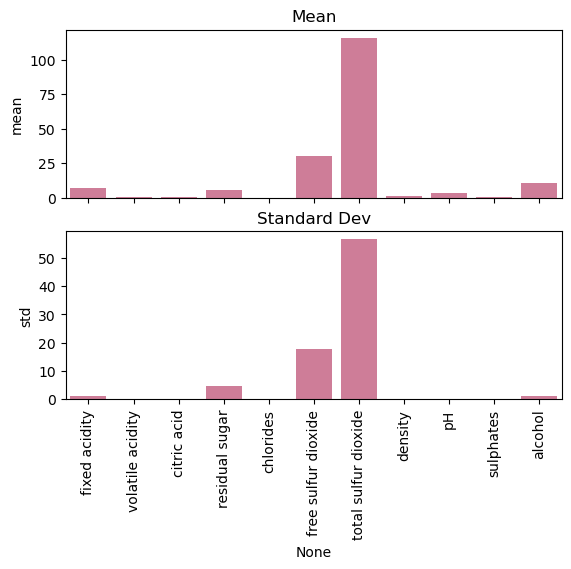

In [11]:
describe_mean = describe_df.loc['mean']
describe_std = describe_df.loc['std']
describe_cols = describe_df.columns

fig,ax = plt.subplots(2,1,sharex=True)

sns.barplot(ax = ax[0],
            x = describe_cols,
            y = describe_mean,
            color = 'palevioletred')

ax[0].set_title('Mean')

sns.barplot(
            ax = ax[1],
            x = describe_cols,
            y = describe_std,
            color = 'palevioletred' 
            )

ax[1].set_title('Standard Dev')

plt.xticks(rotation = 90)
plt.savefig(combined_prelim_path + 'combined_mean_std.png')
plt.show()

#### Wine Type Count

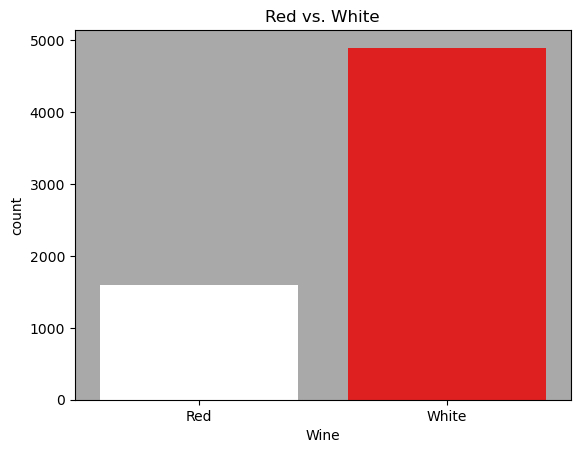

In [12]:
sns.set_style(rc = {'axes.facecolor': 'darkgrey'})
sns.countplot(
               x = all_wine_raw_df['Wine'],
               hue = all_wine_raw_df['Wine'],
               palette=['white',"red"]).set(title='Red vs. White'
              )
plt.savefig(combined_prelim_path + 'red_vs_white_countplot.png')
plt.show()

### Wine quality count

In [13]:
all_wine_raw_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

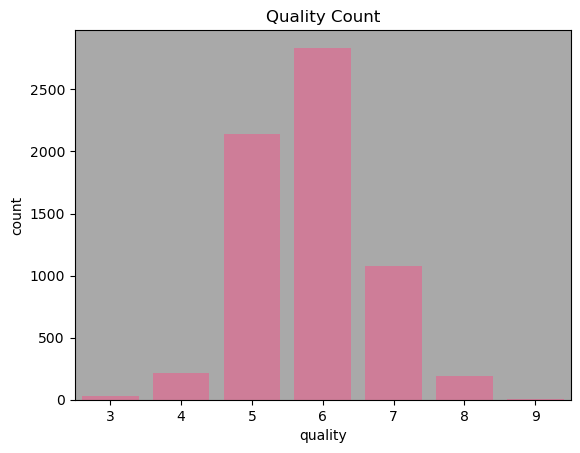

In [14]:
sns.countplot(x = all_wine_raw_df['quality'],
              color='palevioletred').set(title='Quality Count')
plt.savefig(combined_prelim_path + 'quality_count.png')
plt.show()

#### Quality count by wine type

In [15]:
q_w_df = pd.DataFrame(all_wine_raw_df[['quality','Wine']].value_counts())
q_w_df.head()

,,count
quality,Wine,
6,White,2198
5,White,1457
7,White,880
5,Red,681
6,Red,638


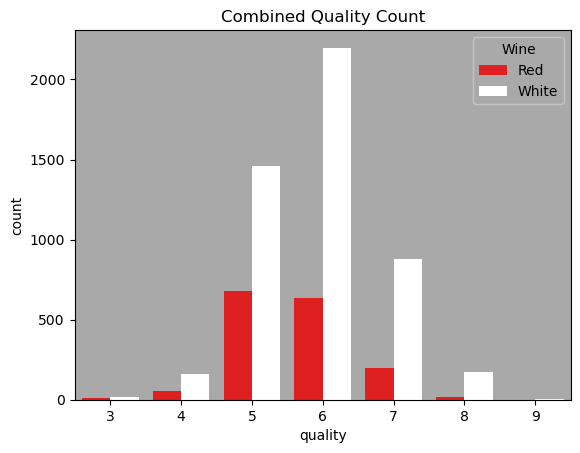

In [16]:
sns.set_style(rc = {'axes.facecolor': 'darkgrey'})
sns.countplot( x = all_wine_raw_df['quality'],
               hue = all_wine_raw_df['Wine'], 
               palette=['red',"white"]).set(title='Combined Quality Count')
plt.savefig(combined_prelim_path + 'Combined_Quality_Count.png')
plt.show()

### Reclassifying quality (low,medium,high)

In [17]:
all_wine_raw_df['quality'] = all_wine_raw_df['quality'].replace([3,4,5],'low')
all_wine_raw_df['quality'] = all_wine_raw_df['quality'].replace([6],'medium')
all_wine_raw_df['quality'] = all_wine_raw_df['quality'].replace([7,8,9],'high')


all_wine_raw_df['quality'] = all_wine_raw_df['quality'].astype('category')

In [18]:
reclassed_q_w_df = pd.DataFrame(all_wine_raw_df[['quality','Wine']].value_counts())
reclassed_q_w_df

,,count
quality,Wine,
medium,White,2198
low,White,1640
high,White,1060
low,Red,744
medium,Red,638
high,Red,217


### Reclassified Viz

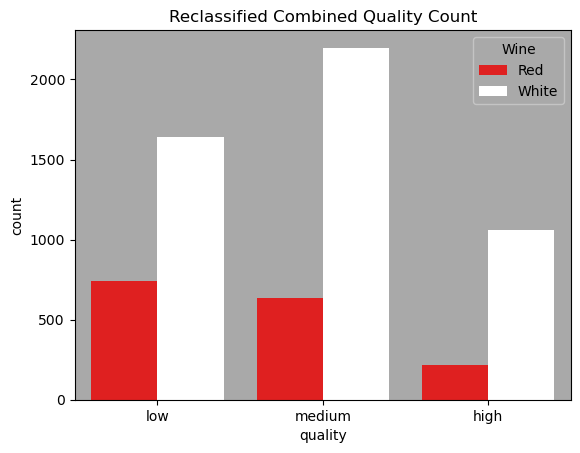

In [19]:
sns.set_style(rc = {'axes.facecolor': 'darkgrey'})
sns.countplot(
               x = all_wine_raw_df['quality'],
               hue = all_wine_raw_df['Wine'], 
               palette=['red',"white"]).set(title='Reclassified Combined Quality Count')
plt.savefig(combined_prelim_path + 'Reclassified_Combined_Quality Count.png')
plt.show()

### Splitting and encoding features

In [20]:
X = all_wine_raw_df.drop(columns = ['Wine','quality',])
y = all_wine_raw_df['quality']

le = LabelEncoder()
le.fit(y)

y = le.transform(y)

### PCA Analysis

In [21]:

def pca_component_make_up(pca,df):
    
    """
        Returns dataframe of features that make up 
        Principal components.

        Args:
            pca: numpy array
            df: pandas dataframe

            Returns:
            feature_df
    """
    

    # Generating dataframe from ndarray
    feature_df  = pd.DataFrame(pca.components_)

    feature_df.columns  = df.columns

    # Absolute value conversion
    feature_df =feature_df.apply(np.abs)

    feature_df = feature_df.transpose()

    ## pcs numbers
    componets_nums = feature_df.shape[1]

    ## Generate the new column names
    new_cols = [f'PC{i}' for i in range(1, componets_nums + 1)]

    ## Now rename
    feature_df.columns  =new_cols

    # Return importance df
    return feature_df



### Unscaled 

### Boxplot

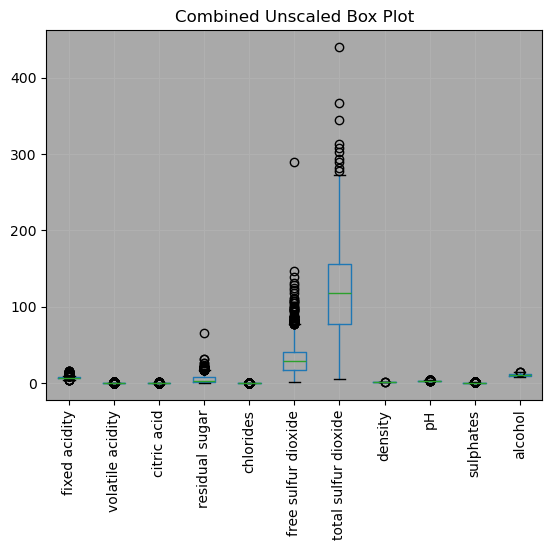

In [22]:
all_wine_raw_df.boxplot()
plt.xticks(rotation=90)
plt.title('Combined Unscaled Box Plot')
plt.savefig(combined_unsc_path +'Combined_Unscaled_Box_Plot.png')
plt.show()

### Principal Components

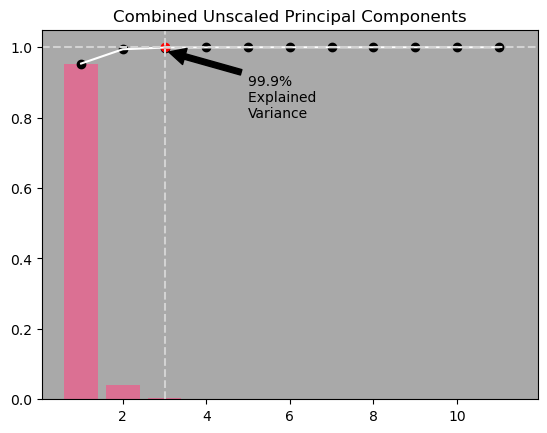

In [23]:
pca = PCA()
pca.fit(X)


n= [*range(1,pca.explained_variance_ratio_.shape[0]+1)]

plt.bar(n,pca.explained_variance_ratio_,color = 'palevioletred')
plt.plot(n,pca.explained_variance_ratio_.cumsum(),color = 'white')
plt.scatter(n,pca.explained_variance_ratio_.cumsum(),color = 'black')
plt.scatter(3,pca.explained_variance_ratio_.sum(),color = 'red')

plt.title('Combined Scaled Principal Components')

exp_var = pca.explained_variance_ratio_[:3].sum().round(3)

plt.axvline(x=3,
            linestyle = '--',
            color = 'lightgrey'
            )

plt.axhline(y= pca.explained_variance_ratio_[:3].sum().round(2),
            linestyle = '--',
            color = 'lightgrey'
            )

plt.annotate(f'{exp_var*100}% \nExplained \nVariance', xy=(3, 0.99), xytext=(5,0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.title('Combined Unscaled Principal Components')

plt.savefig(combined_unsc_path +'combined_unscaled_principal_components.png')
plt.show()

### PCA Scatterplot

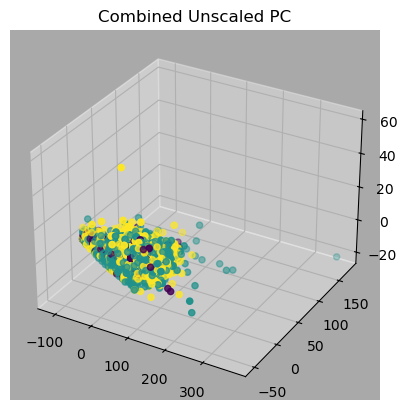

In [24]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

pca_1 = X_pca[:,0]
pca_2= X_pca[:,1]
pca_3 = X_pca[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_1, pca_2, pca_3,c=y)
plt.title('Combined Unscaled PC')
plt.savefig(combined_unsc_path +'combined_unsc_pc_scatter.png')
plt.show()

### Components Make-up

In [25]:
feature_df  = pca_component_make_up(pca, all_wine_raw_df.drop(columns=['Wine','quality']))
# Show first few rows
display(feature_df.head())

,PC1,PC2,PC3
fixed acidity,0.007408,0.005366,0.023798
volatile acidity,0.001184,0.000784,0.000884
citric acid,0.000487,0.000248,0.001929
residual sugar,0.041020,0.018636,0.995274
chlorides,0.000168,0.000067,0.000173


### PCs

#### PC-1 

In [26]:
pc1_features = feature_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 3 feautres are \n')
display(pc1_features )


PC1 top 3 feautres are 



total sulfur dioxide    0.972167
free sulfur dioxide     0.230482
residual sugar          0.041020
fixed acidity           0.007408
alcohol                 0.005452
volatile acidity        0.001184
sulphates               0.000704
pH                      0.000656
citric acid             0.000487
chlorides               0.000168
Name: PC1, dtype: float64

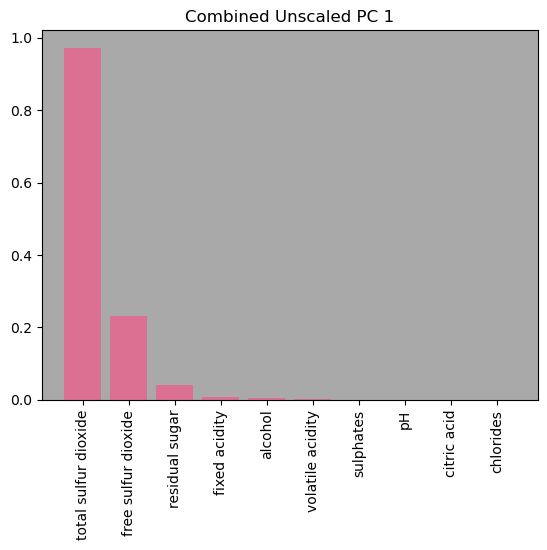

In [27]:
plt.bar(pc1_features.index,pc1_features,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Unscaled PC 1')
plt.savefig(combined_unsc_path +'Combined_Unscaled_PC_1.png')
plt.show()

#### PC-2

In [28]:
pc2_features = feature_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 3 feautres are \n')
display(pc2_features )


PC2 top 3 feautres are 



free sulfur dioxide     0.972658
total sulfur dioxide    0.231410
residual sugar          0.018636
fixed acidity           0.005366
alcohol                 0.002850
volatile acidity        0.000784
pH                      0.000648
sulphates               0.000346
citric acid             0.000248
chlorides               0.000067
Name: PC2, dtype: float64

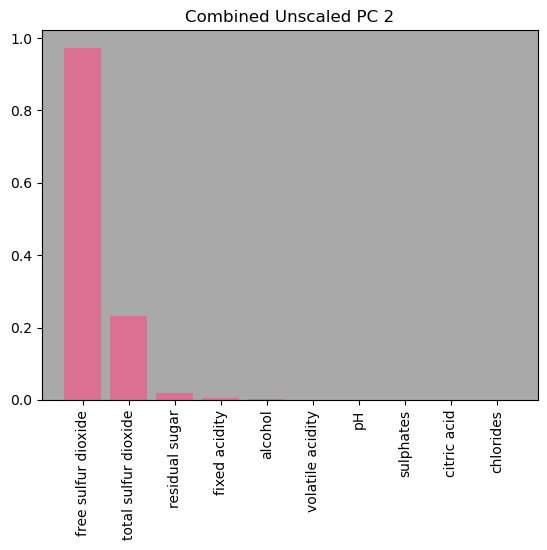

In [29]:
plt.bar(pc2_features.index,pc2_features,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Unscaled PC 2')
plt.savefig(combined_unsc_path +'Combined_Unscaled_PC_2.png')
plt.show()

#### PC-3

In [30]:
pc3_features = feature_df['PC3'].sort_values(ascending = False)[:10]
print(), print(f'PC3 top 3 feautres are \n')
display(pc3_features )


PC3 top 3 feautres are 



residual sugar          0.995274
alcohol                 0.082356
total sulfur dioxide    0.035829
free sulfur dioxide     0.027215
fixed acidity           0.023798
pH                      0.006912
sulphates               0.001935
citric acid             0.001929
volatile acidity        0.000884
density                 0.000460
Name: PC3, dtype: float64

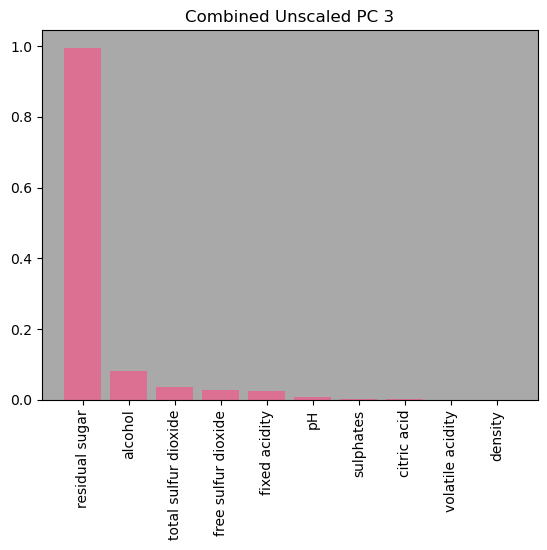

In [31]:
plt.bar(pc3_features.index,pc3_features,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Unscaled PC 3')
plt.savefig(combined_unsc_path +'Combined_Unscaled_PC_3.png')
plt.show()

### Scaled

#### Scaling Data

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Box plot

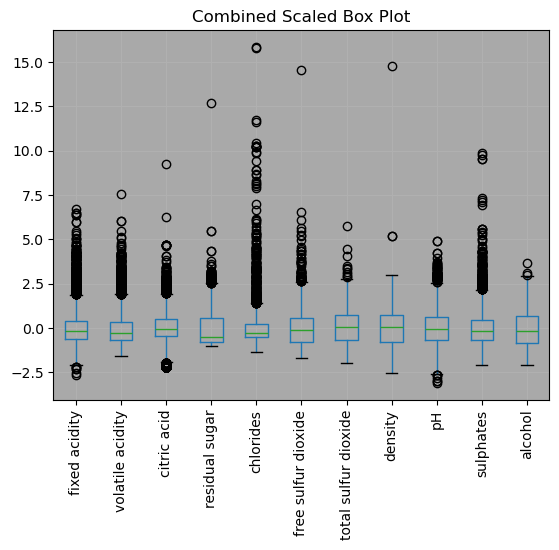

In [33]:
cols = all_wine_raw_df.drop(columns=['Wine','quality']).columns

X_df = pd.DataFrame(X_scaled,columns = cols)
X_df.boxplot()
plt.xticks(rotation=90)

plt.title('Combined Scaled Box Plot')
plt.savefig(combined_sc_path +'Combined_scaled_Box_Plot.png')
plt.show()

### Principal components

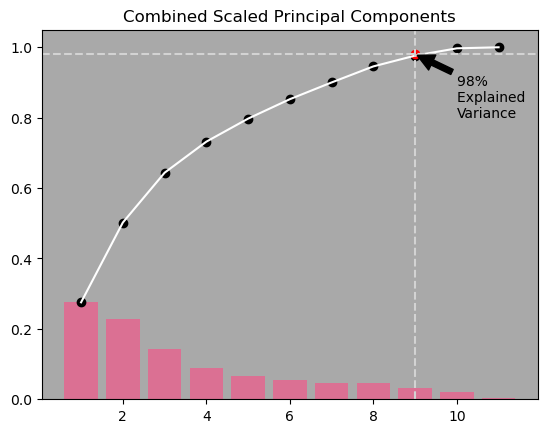

In [34]:
pca_scaled = PCA()
pca_scaled.fit(X_scaled)



n= [*range(1,pca_scaled.explained_variance_ratio_.shape[0]+1)]

plt.bar(n,pca_scaled.explained_variance_ratio_,color = 'palevioletred')
plt.plot(n,pca_scaled.explained_variance_ratio_.cumsum(),color = 'white')
plt.scatter(n,pca_scaled.explained_variance_ratio_.cumsum(),color = 'black')
plt.scatter(9,0.98,color = 'red')


plt.axvline(x=9,
            linestyle = '--',
            color = 'lightgrey'
            )

plt.axhline(y= pca_scaled.explained_variance_ratio_[:9].sum().round(2),
            linestyle = '--',
            color = 'lightgrey'
            )

plt.annotate('98% \nExplained \nVariance', xy=(9, 0.98), xytext=(10,0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.title('Combined Scaled Principal Components')
plt.savefig(combined_sc_path +'combined_scaled_principal_components.png')

plt.show()

### PCA Scatterplot

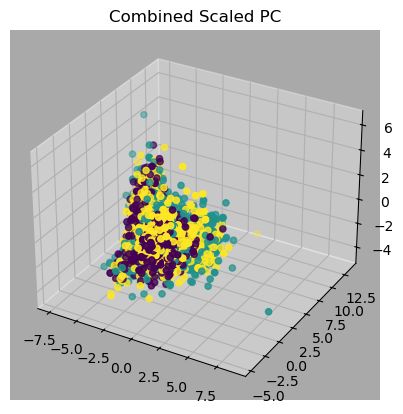

In [35]:
pca_scaled = PCA(n_components = 3)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

pca_1_scaled = X_pca_scaled[:,0]
pca_2_scaled= X_pca_scaled[:,1]
pca_3_scaled = X_pca_scaled[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_1_scaled, pca_2_scaled, pca_3_scaled,c=y)

plt.title('Combined Scaled PC')
plt.savefig(combined_sc_path +'combined_sc_pc_scatter.png')
plt.show()

### Components Make-up

In [36]:
pca_scaled = PCA(n_components = 9)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

feature_df_scaled  = pca_component_make_up(pca_scaled, all_wine_raw_df.drop(columns=['Wine','quality']))
display(feature_df_scaled.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
fixed acidity,0.238799,0.336355,0.434301,0.164346,0.147480,0.204554,0.283079,0.401236,0.344057
volatile acidity,0.380757,0.117550,0.307259,0.212785,0.151456,0.492143,0.389160,0.087435,0.496933
citric acid,0.152388,0.183299,0.590570,0.264300,0.155349,0.227634,0.381285,0.293412,0.402689
residual sugar,0.345920,0.329914,0.164688,0.167443,0.353362,0.233478,0.217976,0.524873,0.108003
chlorides,0.290113,0.315258,0.016679,0.244744,0.614391,0.160976,0.046068,0.471517,0.296444


### PCs

#### PC1

In [37]:
pc1_features_scaled = feature_df_scaled['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 9 feautres are \n')
display(pc1_features_scaled )


PC1 top 9 feautres are 



total sulfur dioxide    0.487418
free sulfur dioxide     0.430914
volatile acidity        0.380757
residual sugar          0.345920
sulphates               0.294135
chlorides               0.290113
fixed acidity           0.238799
pH                      0.218686
citric acid             0.152388
alcohol                 0.106437
Name: PC1, dtype: float64

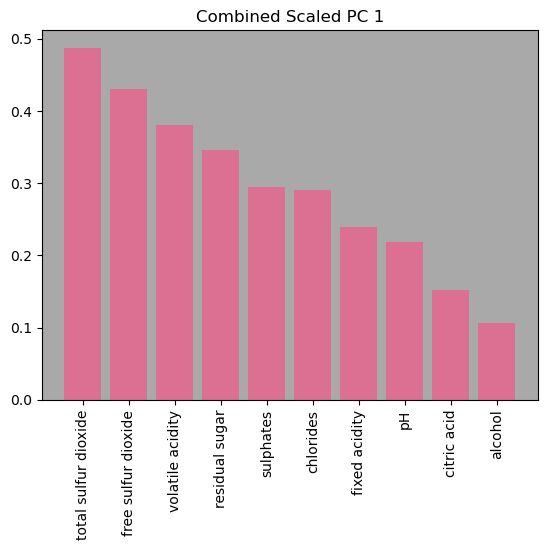

In [38]:
plt.bar(pc1_features_scaled.index,pc1_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 1')
plt.savefig(combined_sc_path +'Combined_scaled_PC_1.png')
plt.show()

#### PC2

In [39]:
pc2_features_scaled = feature_df_scaled['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 9 feautres are \n')
display(pc1_features_scaled )


PC2 top 9 feautres are 



total sulfur dioxide    0.487418
free sulfur dioxide     0.430914
volatile acidity        0.380757
residual sugar          0.345920
sulphates               0.294135
chlorides               0.290113
fixed acidity           0.238799
pH                      0.218686
citric acid             0.152388
alcohol                 0.106437
Name: PC1, dtype: float64

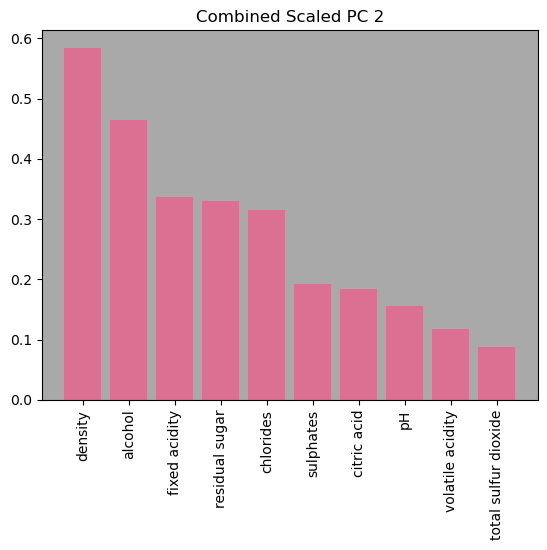

In [40]:
plt.bar(pc2_features_scaled.index,pc2_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 2')
plt.savefig(combined_sc_path +'Combined_scaled_PC_2.png')
plt.show()

#### PC3

In [41]:
pc3_features_scaled = feature_df_scaled['PC3'].sort_values(ascending = False)[:10]
print(), print(f'PC3 top 9 feautres are \n')
display(pc3_features_scaled )


PC3 top 9 feautres are 



citric acid             0.590570
pH                      0.455324
fixed acidity           0.434301
volatile acidity        0.307259
alcohol                 0.261101
density                 0.175606
residual sugar          0.164688
free sulfur dioxide     0.134224
total sulfur dioxide    0.107462
sulphates               0.070042
Name: PC3, dtype: float64

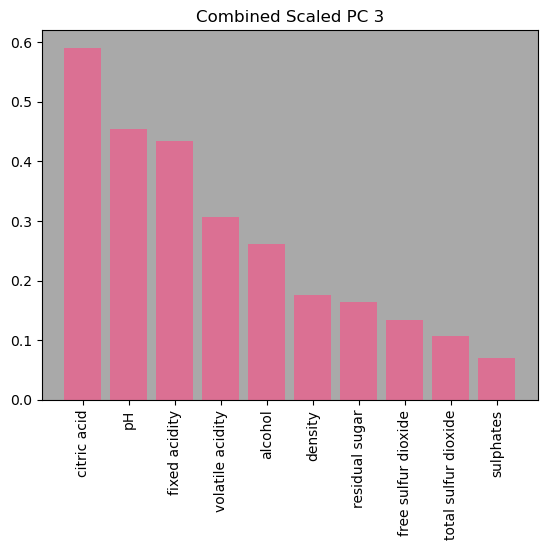

In [42]:
plt.bar(pc3_features_scaled.index,pc3_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 3')
plt.savefig(combined_sc_path +'Combined_scaled_PC_3.png')
plt.show()

#### PC4

In [43]:
pc4_features_scaled = feature_df_scaled['PC4'].sort_values(ascending = False)[:10]
print(), print(f'PC4 top 9 feautres are \n')
display(pc4_features_scaled )


PC4 top 9 feautres are 



sulphates               0.640536
pH                      0.414551
free sulfur dioxide     0.357279
citric acid             0.264300
chlorides               0.244744
volatile acidity        0.212785
total sulfur dioxide    0.208420
residual sugar          0.167443
fixed acidity           0.164346
alcohol                 0.106803
Name: PC4, dtype: float64

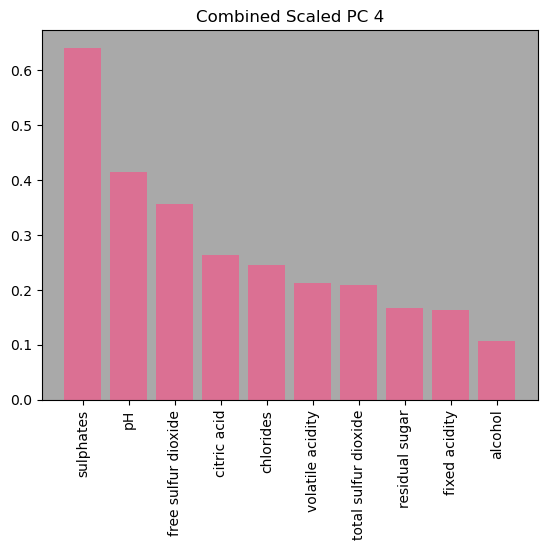

In [44]:
plt.bar(pc4_features_scaled.index,pc4_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 4')
plt.savefig(combined_sc_path +'Combined_scaled_PC_4.png')
plt.show()

#### PC5

In [45]:
pc5_features_scaled = feature_df_scaled['PC5'].sort_values(ascending = False)[:10]
print(), print(f'PC5 top 9 feautres are \n')
display(pc5_features_scaled )


PC5 top 9 feautres are 



chlorides               0.614391
pH                      0.453376
residual sugar          0.353362
density                 0.306561
free sulfur dioxide     0.223532
alcohol                 0.188892
total sulfur dioxide    0.158134
citric acid             0.155349
volatile acidity        0.151456
fixed acidity           0.147480
Name: PC5, dtype: float64

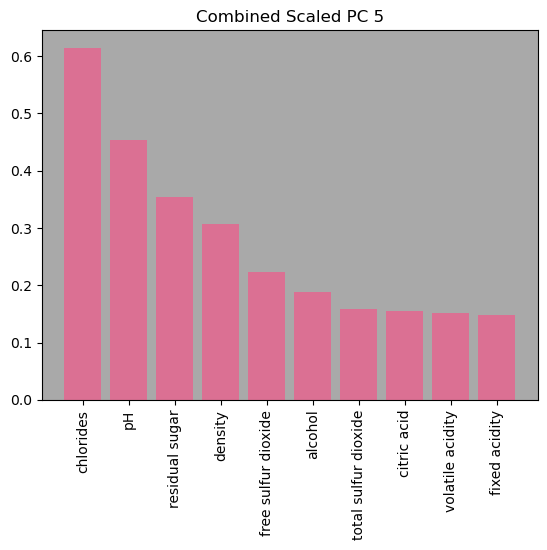

In [46]:
plt.bar(pc5_features_scaled.index,pc5_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 5')
plt.savefig(combined_sc_path +'Combined_scaled_PC_5.png')
plt.show()

#### PC6

In [47]:
pc6_features_scaled = feature_df_scaled['PC6'].sort_values(ascending = False)[:10]
print(), print(f'PC6 top 9 feautres are \n')
display(pc6_features_scaled )


PC6 top 9 feautres are 



alcohol                 0.518378
volatile acidity        0.492143
free sulfur dioxide     0.340051
sulphates               0.296926
pH                      0.296579
residual sugar          0.233478
citric acid             0.227634
fixed acidity           0.204554
chlorides               0.160976
total sulfur dioxide    0.151277
Name: PC6, dtype: float64

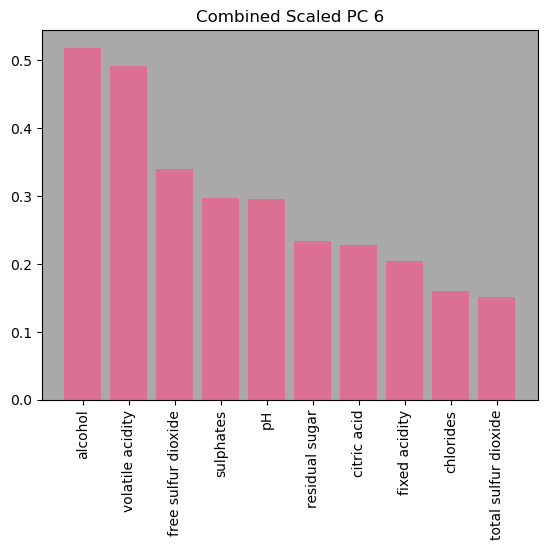

In [48]:
plt.bar(pc6_features_scaled.index,pc6_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 6')
plt.savefig(combined_sc_path +'Combined_scaled_PC_6.png')
plt.show()

#### PC7

In [49]:
pc7_features_scaled = feature_df_scaled['PC7'].sort_values(ascending = False)[:10]
print(), print(f'PC7 top 9 feautres are \n')
display(pc7_features_scaled )


PC7 top 9 feautres are 



sulphates               0.525343
pH                      0.418907
volatile acidity        0.389160
citric acid             0.381285
free sulfur dioxide     0.299363
fixed acidity           0.283079
residual sugar          0.217976
total sulfur dioxide    0.138910
alcohol                 0.104103
density                 0.046759
Name: PC7, dtype: float64

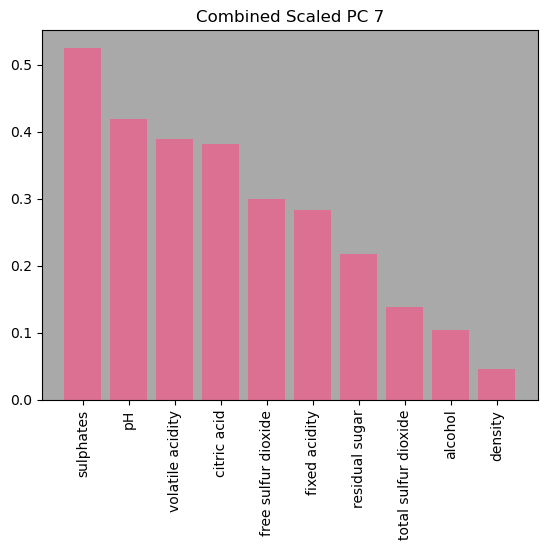

In [50]:
plt.bar(pc7_features_scaled.index,pc7_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 7')
plt.savefig(combined_sc_path +'Combined_scaled_PC_7.png')
plt.show()

#### PC8

In [51]:
pc8_features_scaled = feature_df_scaled['PC8'].sort_values(ascending = False)[:10]
print(), print(f'PC8 top 9 feautres are \n')
display(pc8_features_scaled )


PC8 top 9 feautres are 



residual sugar          0.524873
chlorides               0.471517
fixed acidity           0.401236
alcohol                 0.399234
citric acid             0.293412
free sulfur dioxide     0.207808
sulphates               0.165818
total sulfur dioxide    0.128621
volatile acidity        0.087435
pH                      0.028643
Name: PC8, dtype: float64

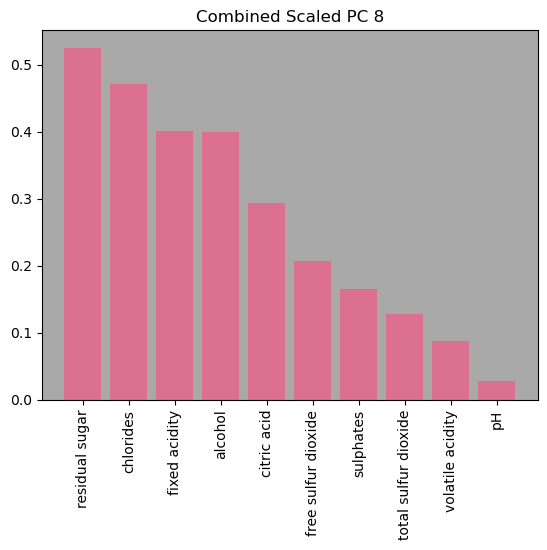

In [52]:
plt.bar(pc8_features_scaled.index,pc8_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 8')
plt.savefig(combined_sc_path +'Combined_scaled_PC_8.png')
plt.show()

#### PC9

In [53]:
pc9_features_scaled = feature_df_scaled['PC9'].sort_values(ascending = False)[:10]
print(), print(f'PC9 top 9 feautres are \n')
display(pc1_features_scaled )


PC9 top 9 feautres are 



total sulfur dioxide    0.487418
free sulfur dioxide     0.430914
volatile acidity        0.380757
residual sugar          0.345920
sulphates               0.294135
chlorides               0.290113
fixed acidity           0.238799
pH                      0.218686
citric acid             0.152388
alcohol                 0.106437
Name: PC1, dtype: float64

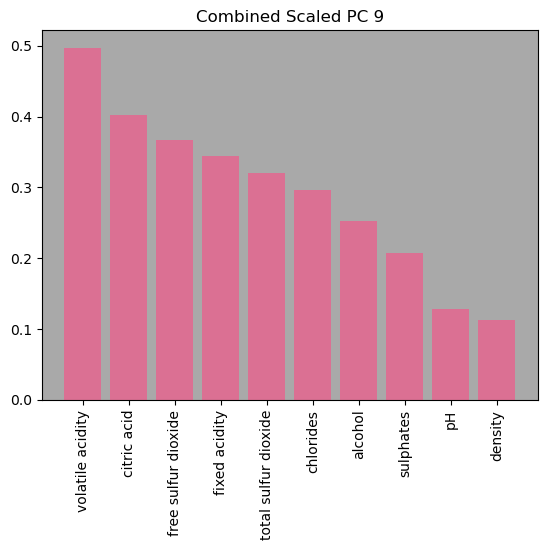

In [54]:
plt.bar(pc9_features_scaled.index,pc9_features_scaled,color = 'palevioletred')
plt.xticks(rotation=90)
plt.title('Combined Scaled PC 9')
plt.savefig(combined_sc_path +'Combined_scaled_PC_9.png')
plt.show()

---

---

### White Wine Data Frame

In [55]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [56]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Casting Category Types

In [57]:
white_wine_df['quality'] = white_wine_df['quality'].astype('category')

### Describe

In [58]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


### Quality count

In [59]:
white_wine_df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

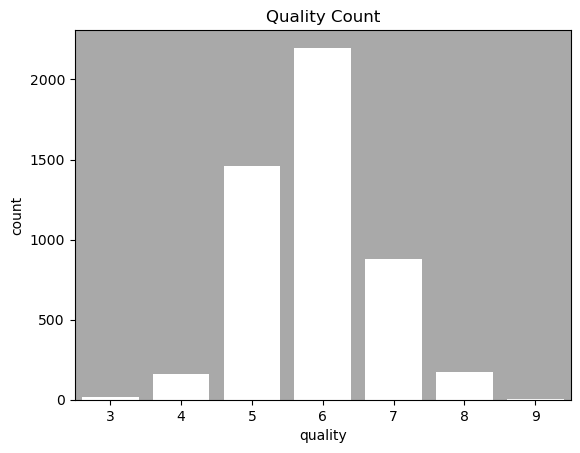

In [60]:
sns.countplot(x = white_wine_df['quality'],color='white').set(title='Quality Count')
plt.savefig(white_prelim_path + 'quality_count.png')
plt.show()

### Reclassifying quality (low,medium,high)

In [61]:
white_wine_df['quality'] = white_wine_df['quality'].replace([3,4,5],'low')
white_wine_df['quality'] = white_wine_df['quality'].replace([6],'medium')
white_wine_df['quality'] = white_wine_df['quality'].replace([7,8,9],'high')


white_wine_df['quality'] = white_wine_df['quality'].astype('category')

In [62]:
reclassed_q_w_df = pd.DataFrame(white_wine_df[['quality']].value_counts())
reclassed_q_w_df

,count
quality,
medium,2198
low,1640
high,1060


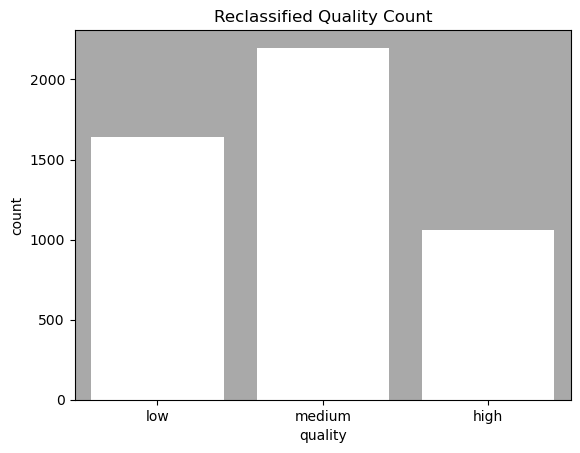

In [63]:
sns.countplot(x = white_wine_df['quality'],color = 'white').set(title='Reclassified Quality Count')
plt.savefig(white_prelim_path + 'reclassified_quality_count.png')
plt.show()

### Splitting & Encoding

In [64]:
X = white_wine_df.drop(columns = ['quality',])
y = white_wine_df['quality']

le = LabelEncoder()
le.fit(y)

y = le.transform(y)

### PCA 

#### Unscaled

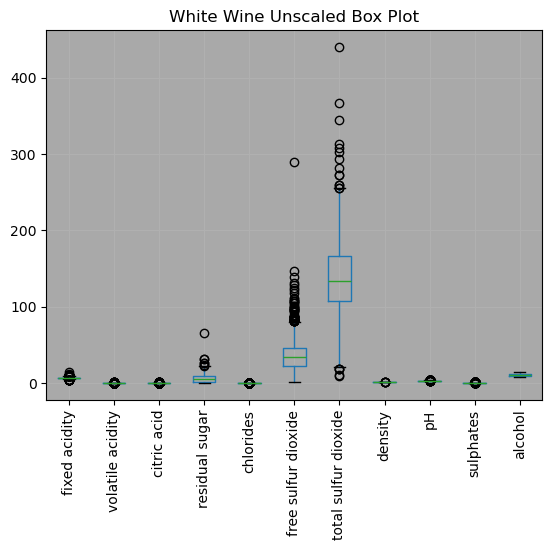

In [65]:
white_wine_df.boxplot()
plt.xticks(rotation=90)
plt.title('White Wine Unscaled Box Plot')
plt.savefig(white_unsc_path +'White_Unscaled_Box_Plot.png')
plt.show()

### Principal Components

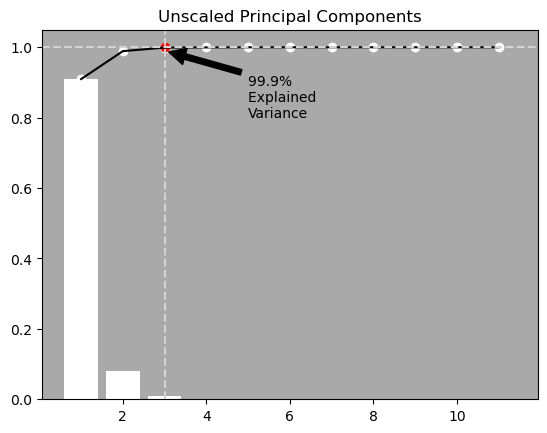

In [66]:
pca = PCA()
pca.fit(X)


n= [*range(1,pca.explained_variance_ratio_.shape[0]+1)]

plt.bar(n,pca.explained_variance_ratio_,color = 'white')
plt.plot(n,pca.explained_variance_ratio_.cumsum(),color = 'black')
plt.scatter(n,pca.explained_variance_ratio_.cumsum(),color = 'white')
plt.scatter(3,pca.explained_variance_ratio_.sum(),color = 'red')

plt.title('Combined Scaled Principal Components')

exp_var = pca.explained_variance_ratio_[:3].sum().round(3)

plt.axvline(x=3,
            linestyle = '--',
            color = 'lightgrey'
            )

plt.axhline(y= pca.explained_variance_ratio_[:3].sum().round(2),
            linestyle = '--',
            color = 'lightgrey'
            )

plt.annotate(f'{exp_var*100}% \nExplained \nVariance', xy=(3, 0.99), xytext=(5,0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.title('Unscaled Principal Components')

plt.savefig(white_unsc_path +'white_unscaled_principal_components.png')
plt.show()

### PCA Scatterplot

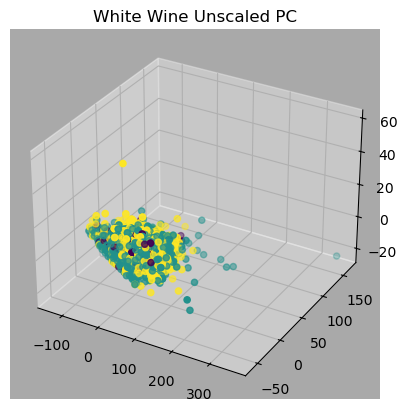

In [67]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

pca_1 = X_pca[:,0]
pca_2= X_pca[:,1]
pca_3 = X_pca[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_1, pca_2, pca_3, 'gray',c=y)
plt.title('White Wine Unscaled PC')
plt.savefig(white_unsc_path +'white_unsc_pc_scatter.png')
plt.show()

### Components Make-up

In [68]:
feature_df  = pca_component_make_up(pca, white_wine_df.drop(columns=['quality']))
# Show first few rows
display(feature_df.head())

,PC1,PC2,PC3
fixed acidity,0.001544,0.009163,0.012900
volatile acidity,0.000169,0.001545,0.000929
citric acid,0.000339,0.000140,0.001258
residual sugar,0.047328,0.014943,0.995192
chlorides,0.000098,0.000072,0.000078


### PCs

#### PC1

In [69]:
pc1_features = feature_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_features )


PC1 top 10 feautres are 



total sulfur dioxide    0.963858
free sulfur dioxide     0.261877
residual sugar          0.047328
alcohol                 0.012504
fixed acidity           0.001544
sulphates               0.000341
citric acid             0.000339
volatile acidity        0.000169
chlorides               0.000098
density                 0.000036
Name: PC1, dtype: float64

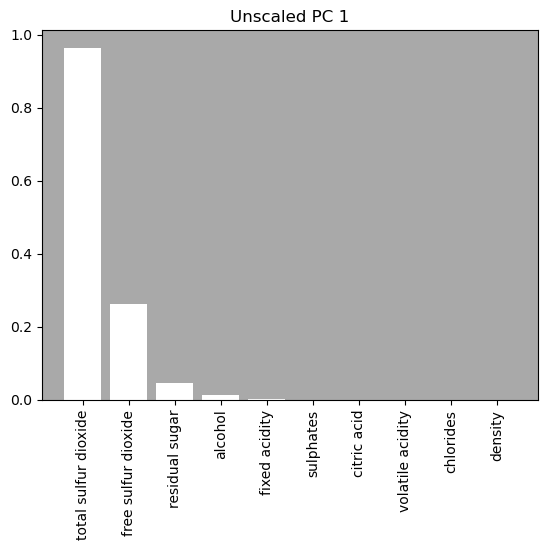

In [70]:
plt.bar(pc1_features.index,pc1_features,color = 'white')
plt.xticks(rotation=90)
plt.title('Unscaled PC 1')
plt.savefig(white_unsc_path +'Unscaled_PC_1.png')
plt.show()

#### PC2

In [71]:
pc2_features = feature_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_features )


PC2 top 10 feautres are 



free sulfur dioxide     0.964685
total sulfur dioxide    0.262737
residual sugar          0.014943
fixed acidity           0.009163
alcohol                 0.006455
volatile acidity        0.001545
sulphates               0.000361
citric acid             0.000140
chlorides               0.000072
pH                      0.000042
Name: PC2, dtype: float64

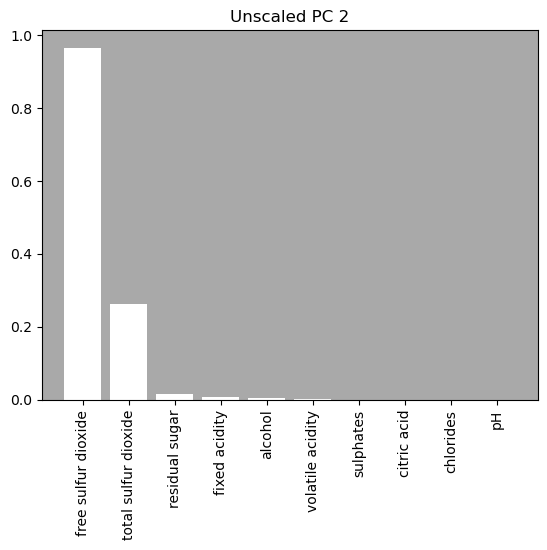

In [72]:
plt.bar(pc2_features.index,pc2_features,color = 'white')
plt.xticks(rotation=90)
plt.title('Unscaled PC 2')
plt.savefig(white_unsc_path +'Unscaled_PC_2.png')
plt.show()

#### PC3

In [73]:
pc3_features = feature_df['PC3'].sort_values(ascending = False)[:10]
print(), print(f'PC3 top 10 feautres are \n')
display(pc3_features )


PC3 top 10 feautres are 



residual sugar          0.995192
alcohol                 0.082723
total sulfur dioxide    0.042789
free sulfur dioxide     0.026393
fixed acidity           0.012900
pH                      0.007017
sulphates               0.002142
citric acid             0.001258
volatile acidity        0.000929
density                 0.000447
Name: PC3, dtype: float64

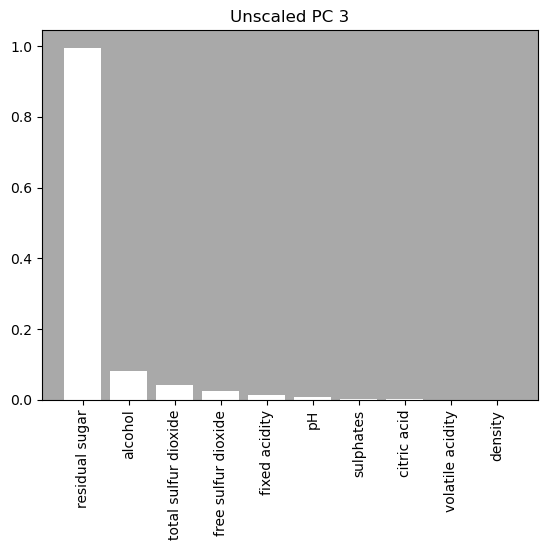

In [74]:
plt.bar(pc3_features.index,pc3_features,color = 'white')
plt.xticks(rotation=90)
plt.title('Unscaled PC 3')
plt.savefig(white_unsc_path +'Unscaled_PC_3.png')
plt.show()

### Scaled 

#### Scaling data

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

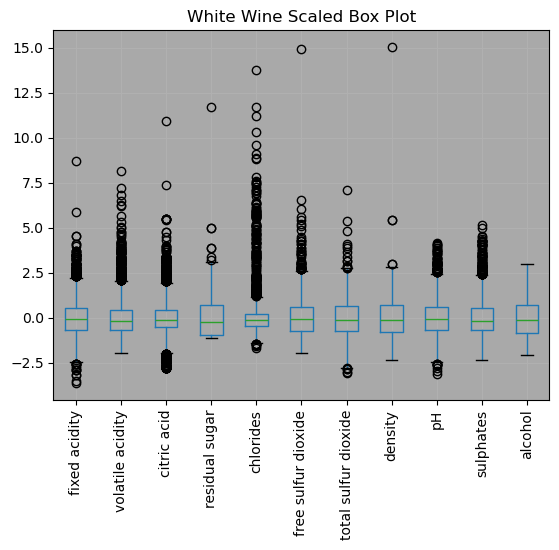

In [76]:
cols = white_wine_df.drop(columns=['quality']).columns

X_df = pd.DataFrame(X_scaled,columns = cols)
X_df.boxplot()
plt.title('White Wine Scaled Box Plot')
plt.savefig(white_sc_path +'white_scaled_Box_Plot.png')
plt.xticks(rotation=90)
plt.show()

### Pricipal Componentes

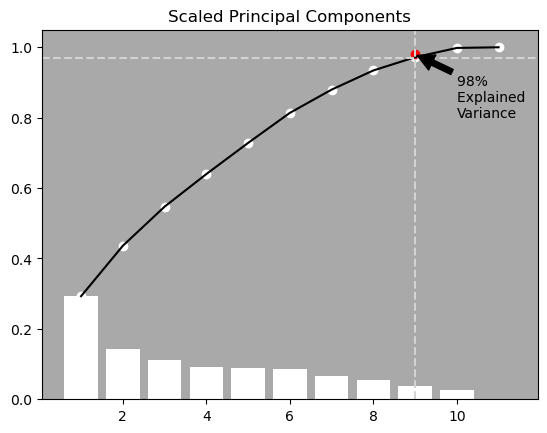

In [77]:
pca_scaled = PCA()
pca_scaled.fit(X_scaled)



n= [*range(1,pca_scaled.explained_variance_ratio_.shape[0]+1)]

plt.bar(n,pca_scaled.explained_variance_ratio_,color = 'white')
plt.plot(n,pca_scaled.explained_variance_ratio_.cumsum(),color = 'black')
plt.scatter(n,pca_scaled.explained_variance_ratio_.cumsum(),color = 'white')
plt.scatter(9,0.98,color = 'red')


plt.axvline(x=9,
            linestyle = '--',
            color = 'lightgrey'
            )

plt.axhline(y= pca_scaled.explained_variance_ratio_[:9].sum().round(2),
            linestyle = '--',
            color = 'lightgrey'
            )

plt.annotate('98% \nExplained \nVariance', xy=(9, 0.98), xytext=(10,0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title('Scaled Principal Components')
plt.savefig(white_sc_path +'white_scaled_principal_components.png')
plt.show()

### Scatterplot  for 3 PCs scaled

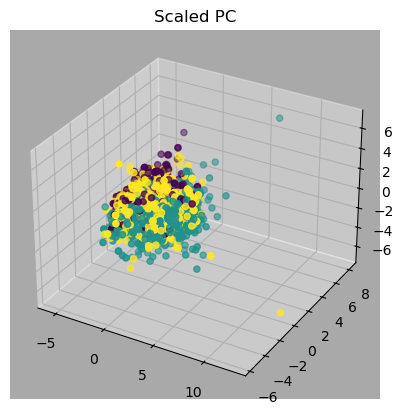

In [78]:
pca_scaled = PCA(n_components = 3)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

pca_1_scaled = X_pca_scaled[:,0]
pca_2_scaled= X_pca_scaled[:,1]
pca_3_scaled = X_pca_scaled[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_1_scaled, pca_2_scaled, pca_3_scaled, 'gray',c=y)

plt.title('Scaled PC')
plt.savefig(white_sc_path +'white_sc_pc_scatter.png')
plt.show()

### Principal components make-up

In [79]:
pca_scaled = PCA(n_components = 9)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

feature_df_scaled  = pca_component_make_up(pca_scaled, all_wine_raw_df.drop(columns=['Wine','quality']))
display(feature_df_scaled.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
fixed acidity,0.157218,0.587558,0.121368,0.018584,0.251048,0.103531,0.197849,0.588355,0.330523
volatile acidity,0.005089,0.051728,0.590971,0.274115,0.642617,0.122338,0.269355,0.028373,0.145910
citric acid,0.144050,0.345295,0.504397,0.148514,0.053905,0.132097,0.705481,0.152287,0.202011
residual sugar,0.427408,0.008749,0.214320,0.273765,0.011391,0.289447,0.212760,0.388186,0.408969
chlorides,0.212011,0.008800,0.102367,0.710712,0.328628,0.395821,0.079484,0.100151,0.393535


### PCs

#### PC1

In [80]:
pc1_features_scaled = feature_df_scaled['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 9 feautres are \n')
display(pc1_features_scaled )


PC1 top 9 feautres are 



density                 0.511524
alcohol                 0.437238
residual sugar          0.427408
total sulfur dioxide    0.406652
free sulfur dioxide     0.300334
chlorides               0.212011
fixed acidity           0.157218
citric acid             0.144050
pH                      0.128832
sulphates               0.043379
Name: PC1, dtype: float64

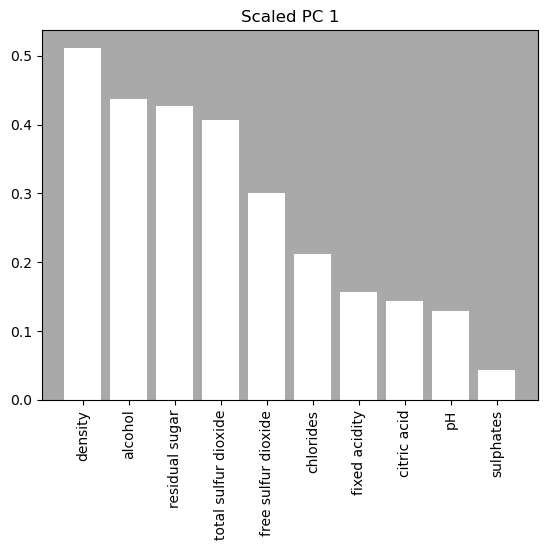

In [81]:
plt.bar(pc1_features_scaled.index,pc1_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 1')
plt.savefig(white_sc_path +'white_scaled_PC_1.png')
plt.show()

#### PC2

In [82]:
pc2_features_scaled = feature_df_scaled['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 9 feautres are \n')
display(pc2_features_scaled )


PC2 top 9 feautres are 



fixed acidity           0.587558
pH                      0.581344
citric acid             0.345295
free sulfur dioxide     0.290355
total sulfur dioxide    0.244032
sulphates               0.222695
volatile acidity        0.051728
alcohol                 0.035569
chlorides               0.008800
residual sugar          0.008749
Name: PC2, dtype: float64

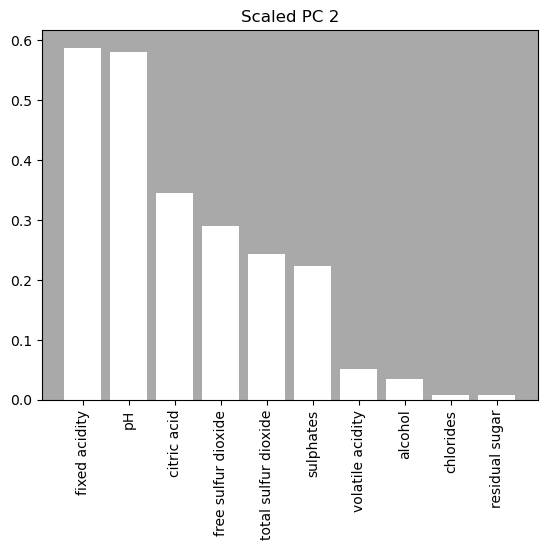

In [83]:
plt.bar(pc2_features_scaled.index,pc2_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 2')
plt.savefig(white_sc_path +'white_scaled_PC_2.png')
plt.show()

#### PC3

In [84]:
pc3_features_scaled = feature_df_scaled['PC3'].sort_values(ascending = False)[:10]
print(), print(f'PC3 top 9 feautres are \n')
display(pc3_features_scaled )


PC3 top 9 feautres are 



volatile acidity        0.590971
citric acid             0.504397
sulphates               0.433244
free sulfur dioxide     0.279410
residual sugar          0.214320
density                 0.129203
pH                      0.126672
total sulfur dioxide    0.124375
fixed acidity           0.121368
alcohol                 0.105903
Name: PC3, dtype: float64

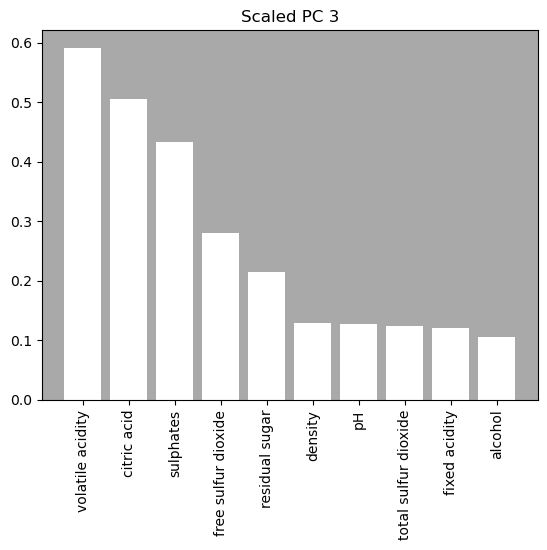

In [85]:
plt.bar(pc3_features_scaled.index,pc3_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 3')
plt.savefig(white_sc_path +'white_scaled_PC_3.png')
plt.show()

#### PC4

In [86]:
pc4_features_scaled = feature_df_scaled['PC4'].sort_values(ascending = False)[:10]
print(), print(f'PC4 top 9 feautres are \n')
display(pc4_features_scaled )


PC4 top 9 feautres are 



chlorides               0.710712
sulphates               0.442060
free sulfur dioxide     0.305585
volatile acidity        0.274115
residual sugar          0.273765
citric acid             0.148514
alcohol                 0.141079
pH                      0.097753
total sulfur dioxide    0.060456
density                 0.022061
Name: PC4, dtype: float64

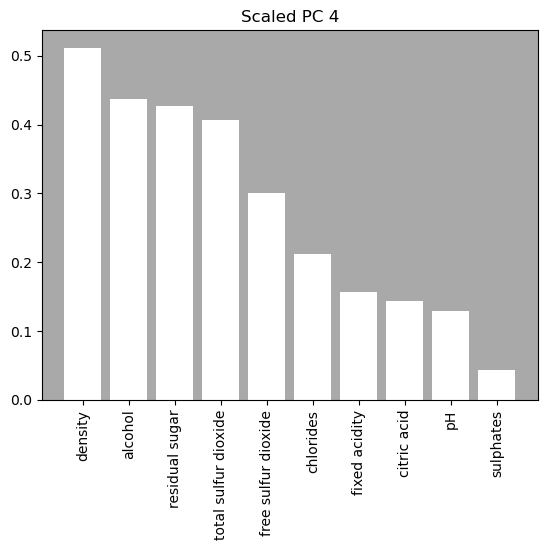

In [87]:
plt.bar(pc1_features_scaled.index,pc1_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 4')
plt.savefig(white_sc_path +'white_scaled_PC_4.png')
plt.show()

#### PC5

In [88]:
pc5_features_scaled = feature_df_scaled['PC5'].sort_values(ascending = False)[:10]
print(), print(f'PC5 top 9 feautres are \n')
display(pc5_features_scaled )


PC5 top 9 feautres are 



volatile acidity        0.642617
sulphates               0.400585
alcohol                 0.337419
chlorides               0.328628
total sulfur dioxide    0.293010
fixed acidity           0.251048
free sulfur dioxide     0.176912
pH                      0.119826
density                 0.084588
citric acid             0.053905
Name: PC5, dtype: float64

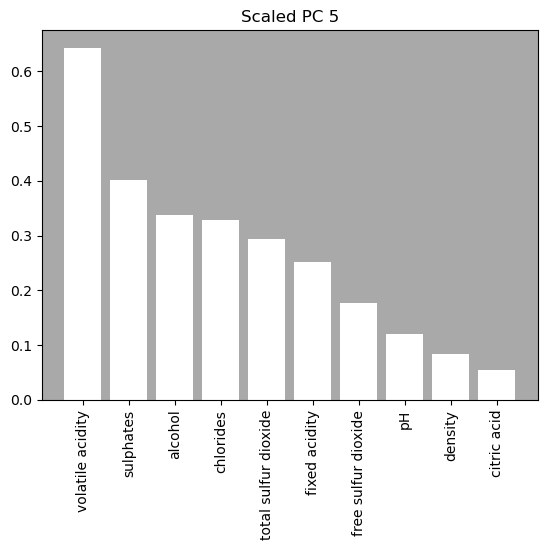

In [89]:
plt.bar(pc5_features_scaled.index,pc5_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 5')
plt.savefig(white_sc_path +'white_scaled_PC_5.png')
plt.show()

#### PC6

In [90]:
pc6_features_scaled = feature_df_scaled['PC6'].sort_values(ascending = False)[:10]
print(), print(f'PC6 top 9 feautres are \n')
display(pc6_features_scaled )


PC6 top 9 feautres are 



free sulfur dioxide     0.494494
sulphates               0.481039
chlorides               0.395821
density                 0.327651
residual sugar          0.289447
total sulfur dioxide    0.276320
pH                      0.193341
alcohol                 0.139284
citric acid             0.132097
volatile acidity        0.122338
Name: PC6, dtype: float64

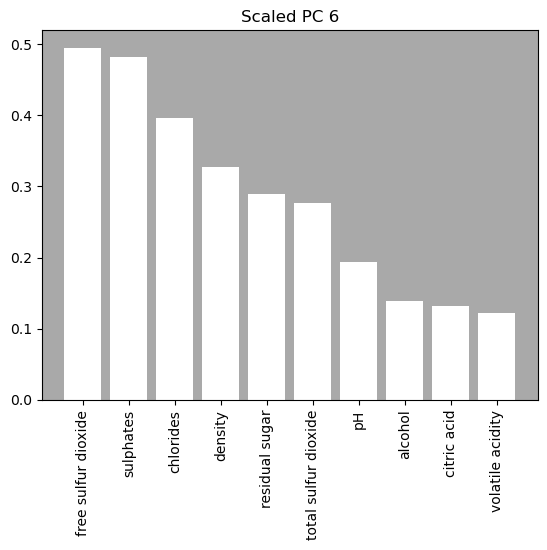

In [91]:
plt.bar(pc6_features_scaled.index,pc6_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 6')
plt.savefig(white_sc_path +'white_scaled_PC_6.png')
plt.show()

#### PC7

In [92]:
pc7_features_scaled = feature_df_scaled['PC7'].sort_values(ascending = False)[:10]
print(), print(f'PC7 top 9 feautres are \n')
display(pc7_features_scaled )


PC7 top 9 feautres are 



citric acid            0.705481
pH                     0.427313
sulphates              0.308562
volatile acidity       0.269355
residual sugar         0.212760
fixed acidity          0.197849
free sulfur dioxide    0.166779
alcohol                0.128922
density                0.110385
chlorides              0.079484
Name: PC7, dtype: float64

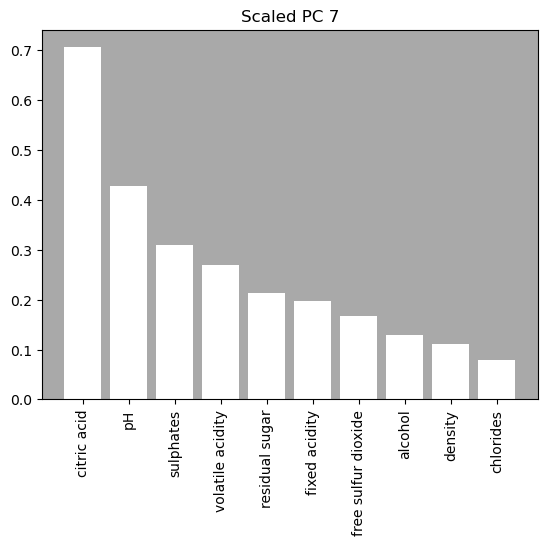

In [93]:
plt.bar(pc7_features_scaled.index,pc7_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 7')
plt.savefig(white_sc_path +'white_scaled_PC_7.png')
plt.show()

#### PC8

In [94]:
pc8_features_scaled = feature_df_scaled['PC8'].sort_values(ascending = False)[:10]
print(), print(f'PC8 top 9 feautres are \n')
display(pc8_features_scaled )


PC8 top 9 feautres are 



fixed acidity           0.588355
pH                      0.533881
residual sugar          0.388186
sulphates               0.270394
total sulfur dioxide    0.247314
alcohol                 0.195859
citric acid             0.152287
chlorides               0.100151
free sulfur dioxide     0.081799
density                 0.069026
Name: PC8, dtype: float64

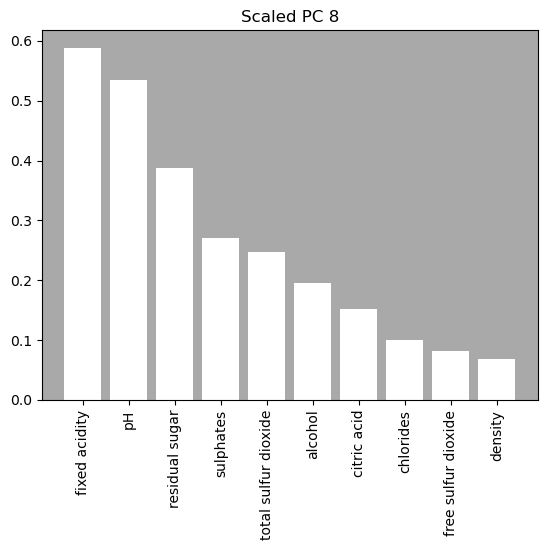

In [95]:
plt.bar(pc8_features_scaled.index,pc8_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 8')
plt.savefig(white_sc_path +'white_scaled_PC_8.png')
plt.show()

#### PC9

In [96]:
pc9_features_scaled = feature_df_scaled['PC9'].sort_values(ascending = False)[:10]
print(), print(f'PC9 top 9 feautres are \n')
display(pc9_features_scaled )


PC9 top 9 feautres are 



alcohol                 0.621091
residual sugar          0.408969
chlorides               0.393535
fixed acidity           0.330523
pH                      0.261298
citric acid             0.202011
total sulfur dioxide    0.154540
volatile acidity        0.145910
free sulfur dioxide     0.144073
density                 0.087888
Name: PC9, dtype: float64

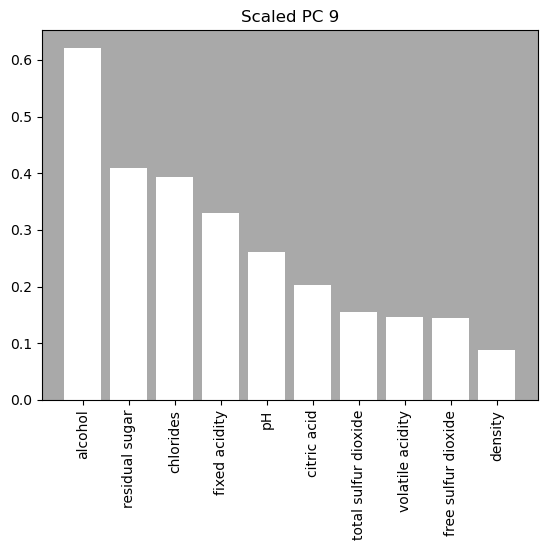

In [97]:
plt.bar(pc9_features_scaled.index,pc9_features_scaled,color = 'white')
plt.xticks(rotation=90)
plt.title('Scaled PC 9')
plt.savefig(white_sc_path +'white_scaled_PC_9.png')
plt.show()

---

---

### Red Wine Dataframe

In [98]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Casting Category types

In [100]:
red_wine_df['quality'] = red_wine_df['quality'].astype('category')

### Describe

In [101]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### Quality Count

In [102]:
red_wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

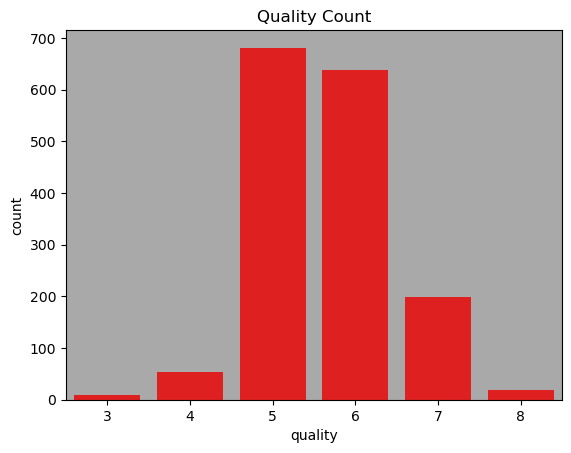

In [103]:
sns.countplot(x = red_wine_df['quality'],color='red').set(title='Quality Count')
plt.savefig(red_prelim_path + 'quality_count.png')
plt.show()

### Reclassifying quality (low,medium,high)

In [104]:
red_wine_df['quality'] = red_wine_df['quality'].replace([3,4,5],'low')
red_wine_df['quality'] = red_wine_df['quality'].replace([6],'medium')
red_wine_df['quality'] = red_wine_df['quality'].replace([7,8,9],'high')


red_wine_df['quality'] = red_wine_df['quality'].astype('category')

In [105]:
reclassed_q_w_df = pd.DataFrame(red_wine_df[['quality']].value_counts())
reclassed_q_w_df

,count
quality,
low,744
medium,638
high,217


### Reclassifiec Quality count

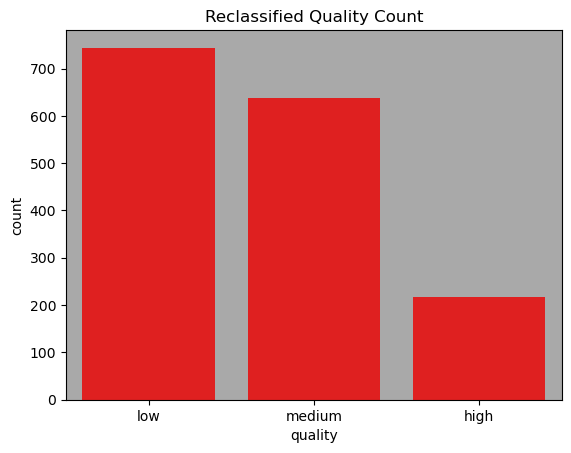

In [106]:
sns.countplot(x = red_wine_df['quality'],color = 'red').set(title='Reclassified Quality Count')
plt.savefig(red_prelim_path + 'reclassified_quality_count.png')
plt.show()

### Splitting & Encoding

In [107]:
X = red_wine_df.drop(columns = ['quality',])
y = red_wine_df['quality']

le = LabelEncoder()
le.fit(y)

y = le.transform(y)

### PCA

#### Unscaled

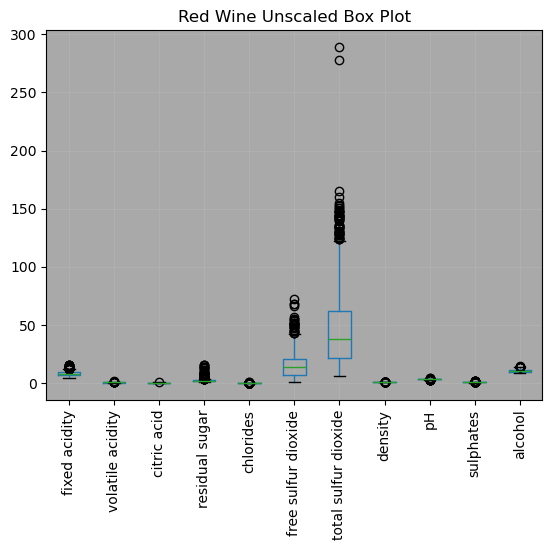

In [108]:
red_wine_df.boxplot()
plt.xticks(rotation=90)
plt.title('Red Wine Unscaled Box Plot')
plt.savefig(red_unsc_path +'Red_Unscaled_Box_Plot.png')
plt.show()

### Principal Components

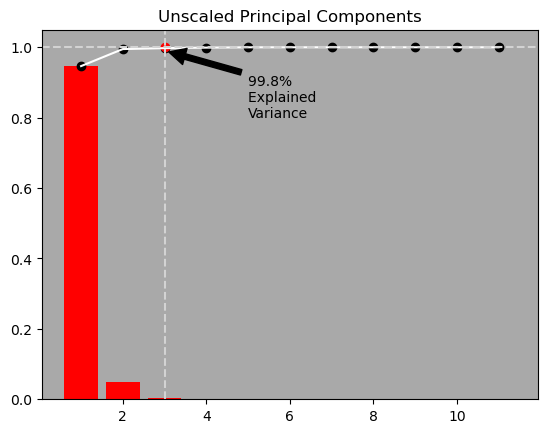

In [109]:
pca = PCA()
pca.fit(X)


n= [*range(1,pca.explained_variance_ratio_.shape[0]+1)]

plt.bar(n,pca.explained_variance_ratio_,color = 'red')
plt.plot(n,pca.explained_variance_ratio_.cumsum(),color = 'white')
plt.scatter(n,pca.explained_variance_ratio_.cumsum(),color = 'black')
plt.scatter(3,pca.explained_variance_ratio_.sum(),color = 'red')

plt.title('Combined Scaled Principal Components')

exp_var = pca.explained_variance_ratio_[:3].sum().round(3)

plt.axvline(x=3,
            linestyle = '--',
            color = 'lightgrey'
            )

plt.axhline(y= pca.explained_variance_ratio_[:3].sum().round(2),
            linestyle = '--',
            color = 'lightgrey'
            )

plt.annotate(f'{exp_var*100}% \nExplained \nVariance', xy=(3, 0.99), xytext=(5,0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.title('Unscaled Principal Components')

plt.savefig(red_unsc_path +'red_unscaled_principal_components.png')
plt.show()

### PCA Scatterplot

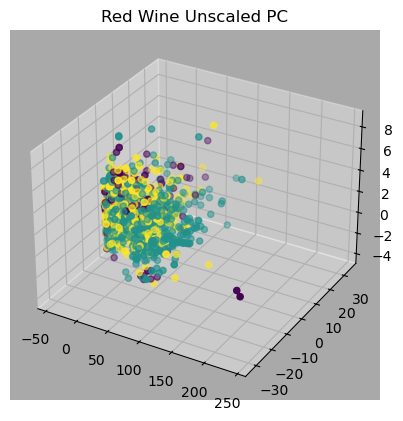

In [110]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

pca_1 = X_pca[:,0]
pca_2= X_pca[:,1]
pca_3 = X_pca[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_1, pca_2, pca_3, 'gray',c=y)
plt.title('Red Wine Unscaled PC')
plt.savefig(red_unsc_path +'red_unsc_pc_scatter.png')
plt.show()

### Components Make-up

In [111]:
feature_df  = pca_component_make_up(pca, red_wine_df.drop(columns=['quality']))

display(feature_df.head())

,PC1,PC2,PC3
fixed acidity,0.006132,0.023899,0.953136
volatile acidity,0.000384,0.002010,0.025132
citric acid,0.000171,0.003035,0.073708
residual sugar,0.008649,0.011135,0.280914
chlorides,0.000064,0.000237,0.002946


### PCs

#### PC1

In [112]:
pc1_features = feature_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc3_features )


PC1 top 10 feautres are 



residual sugar          0.995192
alcohol                 0.082723
total sulfur dioxide    0.042789
free sulfur dioxide     0.026393
fixed acidity           0.012900
pH                      0.007017
sulphates               0.002142
citric acid             0.001258
volatile acidity        0.000929
density                 0.000447
Name: PC3, dtype: float64

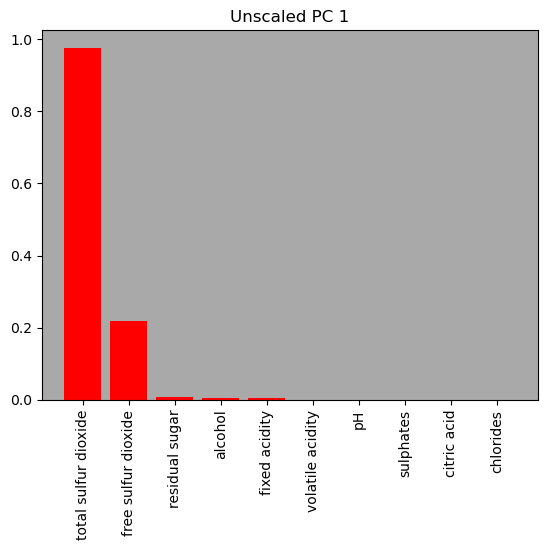

In [113]:
plt.bar(pc1_features.index,pc1_features,color = 'red')
plt.xticks(rotation=90)
plt.title('Unscaled PC 1')
plt.savefig(red_unsc_path +'Unscaled_PC_1.png')
plt.show()

#### PC2

In [114]:
pc2_features = feature_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_features )


PC2 top 10 feautres are 



free sulfur dioxide     0.975266
total sulfur dioxide    0.218917
fixed acidity           0.023899
alcohol                 0.014564
residual sugar          0.011135
pH                      0.003272
citric acid             0.003035
volatile acidity        0.002010
sulphates               0.000619
chlorides               0.000237
Name: PC2, dtype: float64

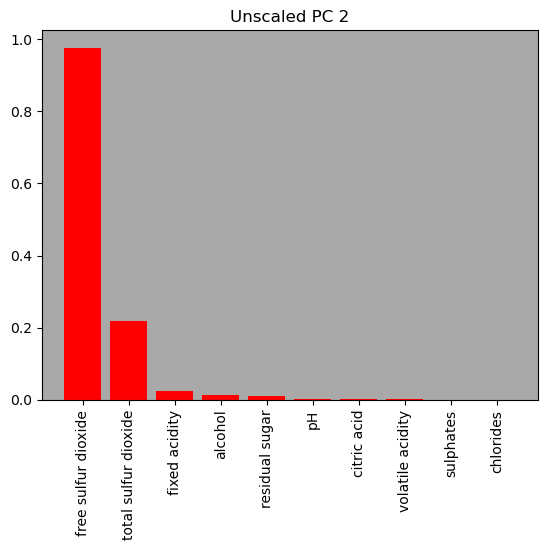

In [115]:
plt.bar(pc2_features.index,pc2_features,color = 'red')
plt.xticks(rotation=90)
plt.title('Unscaled PC 2')
plt.savefig(red_unsc_path +'Unscaled_PC_2.png')
plt.show()

#### PC3

In [116]:
pc3_features = feature_df['PC3'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc3_features )


PC1 top 10 feautres are 



fixed acidity           0.953136
residual sugar          0.280914
citric acid             0.073708
pH                      0.058631
alcohol                 0.048599
volatile acidity        0.025132
free sulfur dioxide     0.020897
sulphates               0.017525
chlorides               0.002946
total sulfur dioxide    0.001527
Name: PC3, dtype: float64

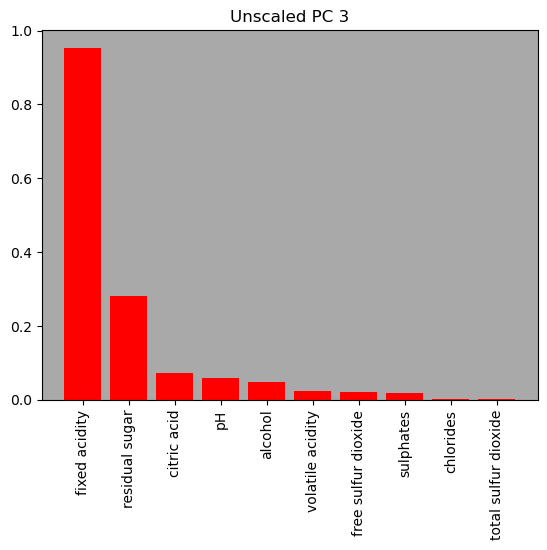

In [117]:
plt.bar(pc3_features.index,pc3_features,color = 'red')
plt.xticks(rotation=90)
plt.title('Unscaled PC 3')
plt.savefig(red_unsc_path +'Unscaled_PC_3.png')

### Scaled 

#### Scaling Data

In [118]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

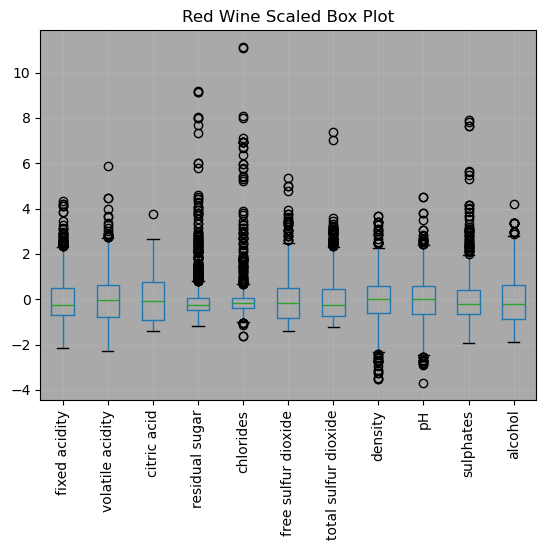

In [119]:
cols = red_wine_df.drop(columns=['quality']).columns

X_df = pd.DataFrame(X_scaled,columns = cols)
X_df.boxplot()
plt.xticks(rotation=90)

plt.title('Red Wine Scaled Box Plot')
plt.savefig(red_sc_path +'red_scaled_Box_Plot.png')
plt.show()

### PCA

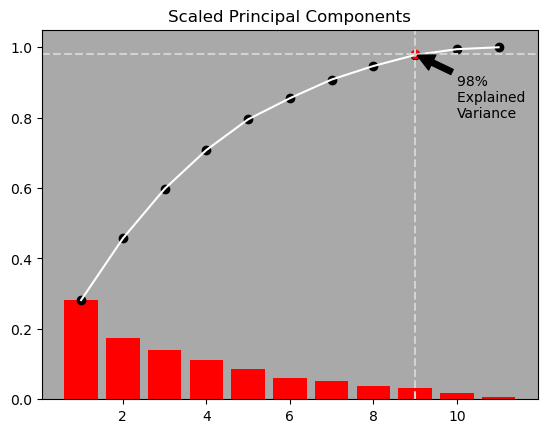

In [120]:
pca_scaled = PCA()
pca_scaled.fit(X_scaled)



n= [*range(1,pca_scaled.explained_variance_ratio_.shape[0]+1)]

plt.bar(n,pca_scaled.explained_variance_ratio_,color = 'red')
plt.plot(n,pca_scaled.explained_variance_ratio_.cumsum(),color = 'white')
plt.scatter(n,pca_scaled.explained_variance_ratio_.cumsum(),color = 'black')
plt.scatter(9,0.98,color = 'red')


plt.axvline(x=9,
            linestyle = '--',
            color = 'lightgrey'
            )

plt.axhline(y= pca_scaled.explained_variance_ratio_[:9].sum().round(2),
            linestyle = '--',
            color = 'lightgrey'
            )

plt.annotate('98% \nExplained \nVariance', xy=(9, 0.98), xytext=(10,0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title('Scaled Principal Components')
plt.savefig(red_sc_path +'red_scaled_principal_components.png')
plt.show()

### Scatterplot  for 3 PCs scaled

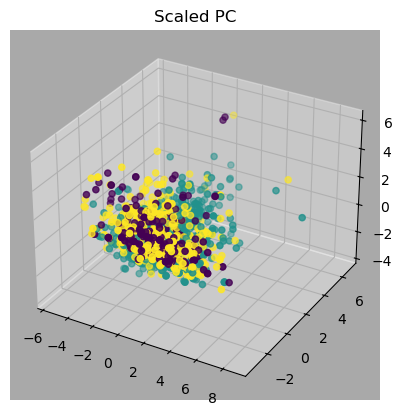

In [121]:
pca_scaled = PCA(n_components = 3)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

pca_1_scaled = X_pca_scaled[:,0]
pca_2_scaled= X_pca_scaled[:,1]
pca_3_scaled = X_pca_scaled[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_1_scaled, pca_2_scaled, pca_3_scaled, 'gray',c=y)

plt.title('Scaled PC')
plt.savefig(red_sc_path +'red_sc_pc_scatter.png')
plt.show()

### Principal components make-up

In [122]:
pca_scaled = PCA(n_components = 9)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

feature_df_scaled  = pca_component_make_up(pca_scaled, all_wine_raw_df.drop(columns=['Wine','quality']))
display(feature_df_scaled.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
fixed acidity,0.489314,0.110503,0.123302,0.229617,0.082614,0.101479,0.350227,0.177595,0.194021
volatile acidity,0.238584,0.274930,0.449963,0.078960,0.218735,0.411449,0.533735,0.078775,0.129110
citric acid,0.463632,0.151791,0.238247,0.079418,0.058573,0.069593,0.105497,0.377516,0.381450
residual sugar,0.146107,0.272080,0.101283,0.372793,0.732144,0.049156,0.290663,0.299845,0.007523
chlorides,0.212247,0.148052,0.092614,0.666195,0.246501,0.304339,0.370413,0.357009,0.111339


### PCs

#### PC1

In [123]:
pc1_features_scaled = feature_df_scaled['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 9 feautres are \n')
display(pc1_features_scaled )


PC1 top 9 feautres are 



fixed acidity          0.489314
citric acid            0.463632
pH                     0.438520
density                0.395353
sulphates              0.242921
volatile acidity       0.238584
chlorides              0.212247
residual sugar         0.146107
alcohol                0.113232
free sulfur dioxide    0.036158
Name: PC1, dtype: float64

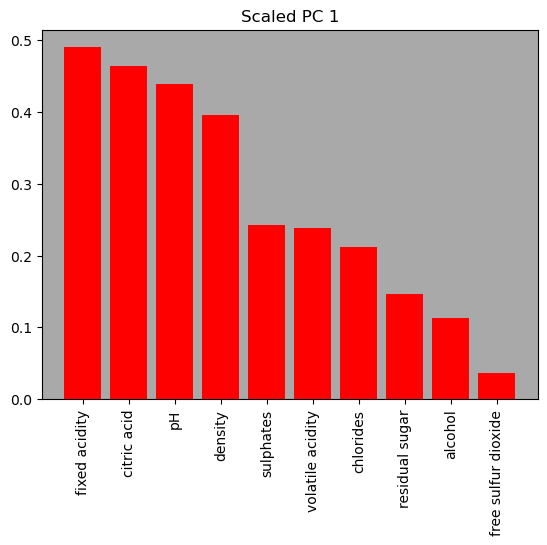

In [124]:
plt.bar(pc1_features_scaled.index,pc1_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 1')
plt.savefig(red_sc_path +'white_scaled_PC_1.png')
plt.show()

#### PC2

In [125]:
pc2_features_scaled = feature_df_scaled['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 9 feautres are \n')
display(pc1_features_scaled )


PC2 top 9 feautres are 



fixed acidity          0.489314
citric acid            0.463632
pH                     0.438520
density                0.395353
sulphates              0.242921
volatile acidity       0.238584
chlorides              0.212247
residual sugar         0.146107
alcohol                0.113232
free sulfur dioxide    0.036158
Name: PC1, dtype: float64

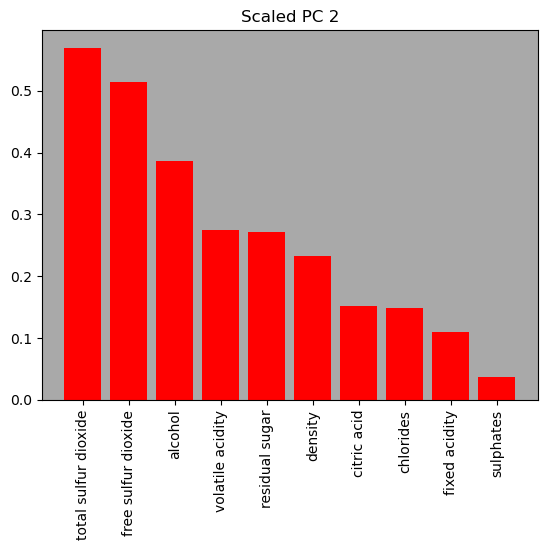

In [126]:
plt.bar(pc2_features_scaled.index,pc2_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 2')
plt.savefig(red_sc_path +'white_scaled_PC_2.png')
plt.show()

#### PC3

In [127]:
pc3_features_scaled = feature_df_scaled['PC3'].sort_values(ascending = False)[:10]
print(), print(f'PC3 top 9 feautres are \n')
display(pc3_features_scaled )


PC3 top 9 feautres are 



alcohol                 0.471673
volatile acidity        0.449963
free sulfur dioxide     0.428793
density                 0.338871
total sulfur dioxide    0.322415
sulphates               0.279786
citric acid             0.238247
fixed acidity           0.123302
residual sugar          0.101283
chlorides               0.092614
Name: PC3, dtype: float64

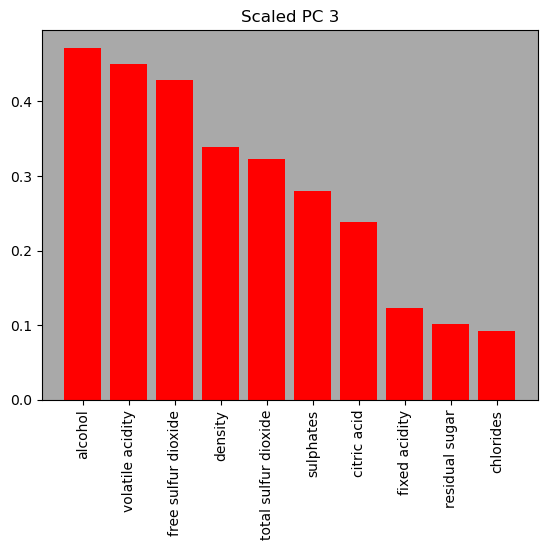

In [128]:
plt.bar(pc3_features_scaled.index,pc3_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 3')
plt.savefig(red_sc_path +'white_scaled_PC_3.png')
plt.show()

#### PC4

In [129]:
pc4features_scaled = feature_df_scaled['PC4'].sort_values(ascending = False)[:10]
print(), print(f'PC4 top 9 feautres are \n')
display(pc4_features_scaled )


PC4 top 9 feautres are 



chlorides               0.710712
sulphates               0.442060
free sulfur dioxide     0.305585
volatile acidity        0.274115
residual sugar          0.273765
citric acid             0.148514
alcohol                 0.141079
pH                      0.097753
total sulfur dioxide    0.060456
density                 0.022061
Name: PC4, dtype: float64

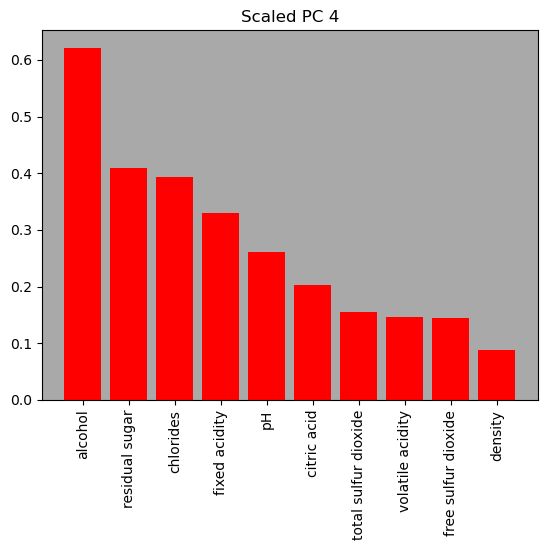

In [130]:
plt.bar(pc9_features_scaled.index,pc9_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 4')
plt.savefig(red_sc_path +'white_scaled_PC_4.png')
plt.show()

#### PC5

In [131]:
pc5_features_scaled = feature_df_scaled['PC5'].sort_values(ascending = False)[:10]
print(), print(f'PC5 top 9 feautres are \n')
display(pc5_features_scaled )


PC5 top 9 feautres are 



residual sugar          0.732144
alcohol                 0.350681
pH                      0.267530
chlorides               0.246501
sulphates               0.225962
total sulfur dioxide    0.222465
volatile acidity        0.218735
free sulfur dioxide     0.159152
density                 0.157077
fixed acidity           0.082614
Name: PC5, dtype: float64

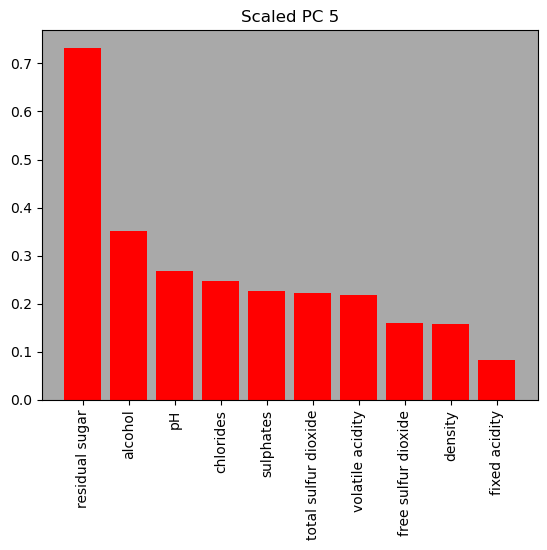

In [132]:
plt.bar(pc5_features_scaled.index,pc5_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 5')
plt.savefig(red_sc_path +'white_scaled_PC_5.png')
plt.show()

#### PC6

In [133]:
pc6_features_scaled = feature_df_scaled['PC6'].sort_values(ascending = False)[:10]
print(), print(f'PC9 top 9 feautres are \n')
display(pc6_features_scaled )


PC9 top 9 feautres are 



pH                      0.522116
volatile acidity        0.411449
density                 0.391152
sulphates               0.381263
alcohol                 0.361645
chlorides               0.304339
total sulfur dioxide    0.136308
fixed acidity           0.101479
citric acid             0.069593
residual sugar          0.049156
Name: PC6, dtype: float64

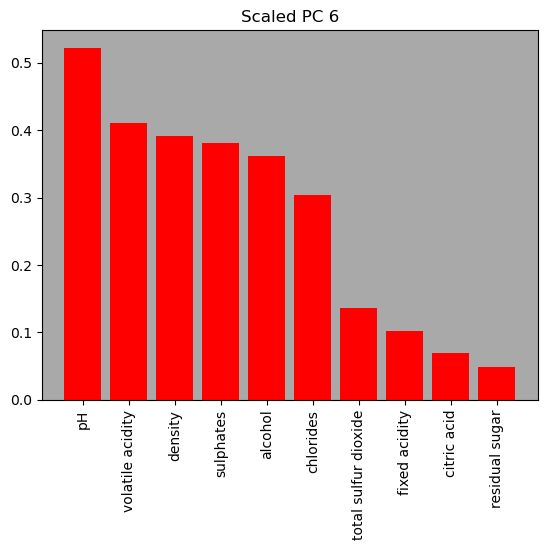

In [134]:
plt.bar(pc6_features_scaled.index,pc6_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 6')
plt.savefig(red_sc_path +'white_scaled_PC_6.png')
plt.show()

#### PC7

In [135]:
pc7_features_scaled = feature_df_scaled['PC7'].sort_values(ascending = False)[:10]
print(), print(f'PC7 top 9 feautres are \n')
display(pc7_features_scaled )


PC7 top 9 feautres are 



volatile acidity        0.533735
sulphates               0.447469
chlorides               0.370413
fixed acidity           0.350227
alcohol                 0.327651
residual sugar          0.290663
density                 0.170481
free sulfur dioxide     0.116596
citric acid             0.105497
total sulfur dioxide    0.093662
Name: PC7, dtype: float64

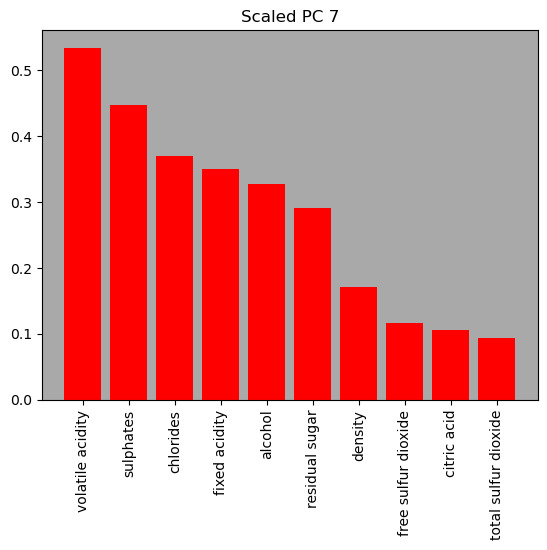

In [136]:
plt.bar(pc7_features_scaled.index,pc7_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 7')
plt.savefig(red_sc_path +'white_scaled_PC_7.png')
plt.show()

#### PC8

In [137]:
pc8_features_scaled = feature_df_scaled['PC8'].sort_values(ascending = False)[:10]
print(), print(f'PC9 top 9 feautres are \n')
display(pc8_features_scaled )


PC9 top 9 feautres are 



pH                     0.561391
citric acid            0.377516
sulphates              0.374604
chlorides              0.357009
residual sugar         0.299845
density                0.239223
alcohol                0.217626
free sulfur dioxide    0.204781
fixed acidity          0.177595
volatile acidity       0.078775
Name: PC8, dtype: float64

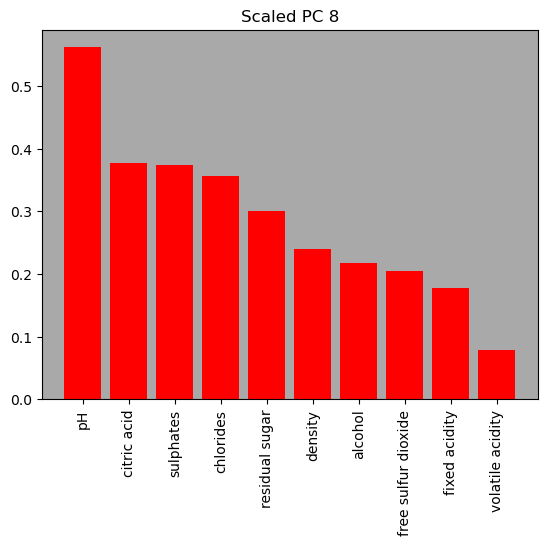

In [138]:
plt.bar(pc8_features_scaled.index,pc8_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 8')
plt.savefig(red_sc_path +'white_scaled_PC_8.png')
plt.show()

#### PC9

In [139]:
pc9_features_scaled = feature_df_scaled['PC9'].sort_values(ascending = False)[:10]
print(), print(f'PC9 top 9 feautres are \n')
display(pc9_features_scaled )


PC9 top 9 feautres are 



free sulfur dioxide     0.635405
total sulfur dioxide    0.592116
citric acid             0.381450
fixed acidity           0.194021
pH                      0.167746
volatile acidity        0.129110
chlorides               0.111339
sulphates               0.058367
alcohol                 0.037603
density                 0.020719
Name: PC9, dtype: float64

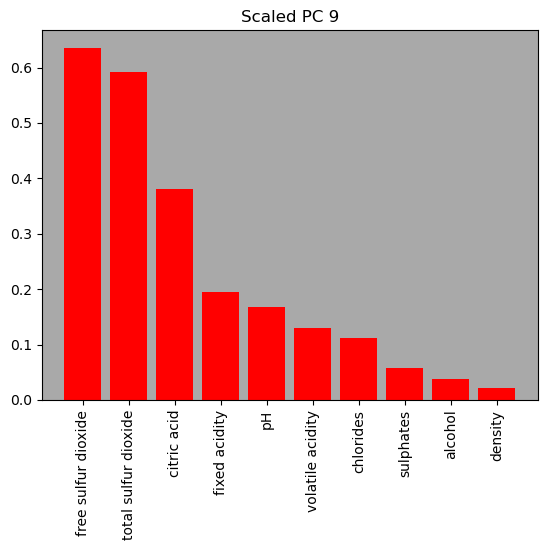

In [140]:
plt.bar(pc9_features_scaled.index,pc9_features_scaled,color = 'red')
plt.xticks(rotation=90)

plt.title('Scaled PC 9')
plt.savefig(red_sc_path +'white_scaled_PC_9.png')
plt.show()